# Data Pre-Processing

In [21]:
import pandas as pd
import seaborn as sbs

In [22]:
# Loading data form file
data = pd.read_csv("data/neo_v2.csv")
data.shape

(90836, 10)

In [23]:
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [24]:
# Combine the est_diameter_max and est_diameter_min into one column as mean
data["est_diameter_mean"] = (data["est_diameter_max"] + data["est_diameter_min"])/2
# Drop unusefulls features
data = data.drop(columns=["est_diameter_min", "est_diameter_max", "name", "orbiting_body", "sentry_object"])
data.head()

,id,relative_velocity,miss_distance,absolute_magnitude,hazardous,est_diameter_mean
0,2162635,13569.249224,5.483974e+07,16.73,False,1.938843
1,2277475,73588.726663,6.143813e+07,20.00,True,0.430073
2,2512244,114258.692129,4.979872e+07,17.83,False,1.168268
3,3596030,24764.303138,2.543497e+07,22.20,False,0.156150
4,3667127,42737.733765,4.627557e+07,20.09,True,0.412613


In [25]:
#Change th position of columns
cols = data.columns.to_list()
cols = [cols[0]] + [cols[5]] + cols[1:5]
data = data[cols]

In [26]:
#Map True and False into 1 and 0
from sklearn.preprocessing import LabelEncoder

label_encoder_hazardous = LabelEncoder()
data['hazardous'] = label_encoder_hazardous.fit_transform(data['hazardous'])
data.head()

,id,est_diameter_mean,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,1.938843,13569.249224,5.483974e+07,16.73,0
1,2277475,0.430073,73588.726663,6.143813e+07,20.00,1
2,2512244,1.168268,114258.692129,4.979872e+07,17.83,0
3,3596030,0.156150,24764.303138,2.543497e+07,22.20,0
4,3667127,0.412613,42737.733765,4.627557e+07,20.09,1


In [27]:
# Save processd data into new file
data.to_csv("data/NEO_v2_refined.csv", index=False)

<AxesSubplot:xlabel='absolute_magnitude', ylabel='miss_distance'>

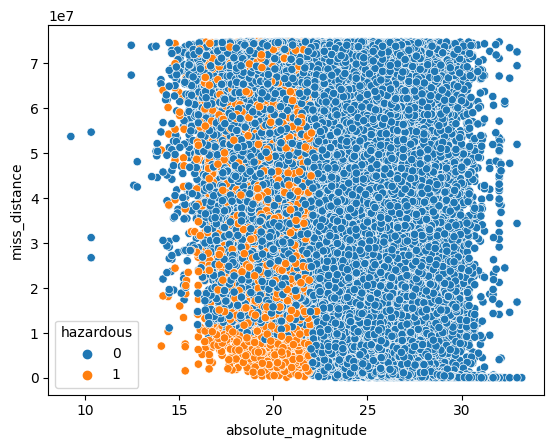

In [28]:
# Simple data visualization for highlight the unbalancing
sbs.scatterplot(data=data, x="absolute_magnitude", y ="miss_distance", hue="hazardous")